In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import time

In [2]:
class LogisticRegression():
    
    def __init__(self, data, epochs, learnig_rate, layer_dim=1):
        
        self.X = data[0].T # n x m
        self.y = data[1].reshape(1, -1) # 1 x m
        
        self.nx = self.X.shape[0] # n
        self.m = self.X.shape[1] # m
        
        self.parameters = {}
        
        self.layer_dim = layer_dim
        self.parameters['W' + str(1)] = np.random.randn(self.layer_dim, self.nx) * 0.01 # 4 x n
        self.parameters["b" + str(1)] = np.zeros((self.layer_dim, 1))

        self.epochs = epochs
        self.costs = np.zeros((epochs, 1))
        self.learning_rate = learnig_rate
    
    @staticmethod
    def sigmoid(Z):
        
        A = ( 1 + np.exp(-Z) ) ** -1

        return A
    
    
    def compute_cost(self, A):

        loss = - ( ( np.dot(self.y, np.log(A.T)) + np.dot((1 - self.y), np.log(1 - A.T)) ) ) / self.m
        
        return loss
    
    @staticmethod
    def forward_pass(A0, W, b):

        Z = np.dot(W, A0) + b

        return Z
    
    def backward_pass(self, A):
        
        dZ = A - self.y
        
        dW = np.dot(self.X, dZ.T) / self.m
        
        db = np.sum(dZ) / self.m
        
        return dZ, dW, db
    
    def update_gradients(self, dZ, dW, db):
        
        self.parameters["W1"] -= self.learning_rate * dW
        self.parameters["b1"] -= self.learning_rate * db

        
    def plot(self):
        
        _ = plt.plot(self.costs)
        _ = plt.plot(self.costs.argmin(), self.costs.min(), "ro", markerfacecolor="w")
        _ = plt.text(self.costs.argmin() - 100, self.costs.min() + 0.05, f"{self.costs.min():.3f}")
        
    
    def launch_network(self, print_cost=False):
        
        
        for e in range(self.epochs):
            
            Z = self.forward_pass(self.X, self.parameters["W1"], self.parameters["b1"])
            A = self.sigmoid(Z)
            loss = self.compute_cost(A)
            self.costs[e] = loss
            
            dZ, dW, db = self.backward_pass(A)
            self.update_gradients(dZ, dW.T, db)
            
            if e % 250 == 0 and print_cost:
                print(f"Cost after iteration {e} = {np.round(np.squeeze(loss), 3)}")
                

In [3]:
data = make_classification(1000, n_features=4, class_sep=1)

Cost after iteration 0 = 0.702
Cost after iteration 250 = 0.242
Cost after iteration 500 = 0.189
Cost after iteration 750 = 0.169
Cost after iteration 1000 = 0.157
Total Time = 0.058


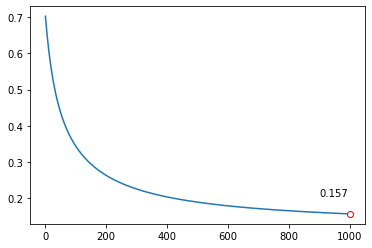

In [4]:
begin = time.time()
Lreg = LogisticRegression(data, epochs=1001, learnig_rate=0.02)
_ = Lreg.launch_network(print_cost=True)
_ = Lreg.plot()
end = time.time()
print(f"Total Time = {np.round(end - begin, 3)}")